# Imports

In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder, StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error as mae, accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from preprocess import preprocess, process
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Data 

In [165]:
data = pd.read_csv('jobfair_train.csv')

In [166]:
data

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,Italy,iOS Phone,9,0,4.0,0,16,100,147,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55309,173,14278145,2906514,0) NonPayer,2,25,4.160909,3.948086,0.503241,11,...,Switzerland,iOS Phone,13,25,NaN,42,10,25,37,1
55310,173,14309556,2906913,2) Minnow,2,21,4.244145,3.762286,0.664514,28,...,France,iOS Phone,25,167,NaN,214,158,358,256,1
55311,173,14455654,2905985,0) NonPayer,1,21,4.000158,3.753276,0.507620,6,...,France,iOS Tablet,14,17,NaN,73,11,70,57,11
55312,173,13623733,2910437,0) NonPayer,5,24,4.582158,4.461391,0.664767,28,...,Morocco,Android Phone,22,80,4.0,90,65,109,150,5


In [167]:
# data = data.drop(['season', 'club_id'], axis=1)

# Data split

In [168]:
X = data.drop('league_rank', axis=1)
y = data['league_rank']-1

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [170]:
X_train = preprocess(X_train, y_train)

In [171]:
X_test = process(X_test)

In [172]:
print(X_train.shape, X_test.shape)

(44251, 36) (11063, 36)


In [173]:
standard_scaler = StandardScaler()

In [174]:
# X_train = standard_scaler.fit_transform(X_train)
# X_test = standard_scaler.transform(X_test)

# Model training and evaluation

In [175]:
# model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model = XGBRegressor(device='cuda', max_depth=4, n_estimators=1000)
# model = KNeighborsClassifier(n_neighbors=15, weights='distance', n_jobs=-1)
# model = SVC()

In [177]:
X = preprocess(X, y)
cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-2.26456393, -2.24908703, -2.24754145, -2.27213686, -2.23422354])

In [155]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [156]:
model.set_params(device='cpu')

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [157]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [158]:
r2_score(y_train, y_train_pred)
# accuracy_score(y_train, y_train_pred)

0.7716900795861803

In [159]:
r2_score(y_test, y_test_pred)
# accuracy_score(y_test, y_test_pred)

0.5054165990698158

In [160]:
y_test_pred = np.where(y_test_pred < 0, 0, y_test_pred)
y_test_pred = np.where(y_test_pred > 13, 13, y_test_pred)

In [161]:
mae(np.round(y_test_pred), y_test)

2.2217300912953086

<AxesSubplot:>

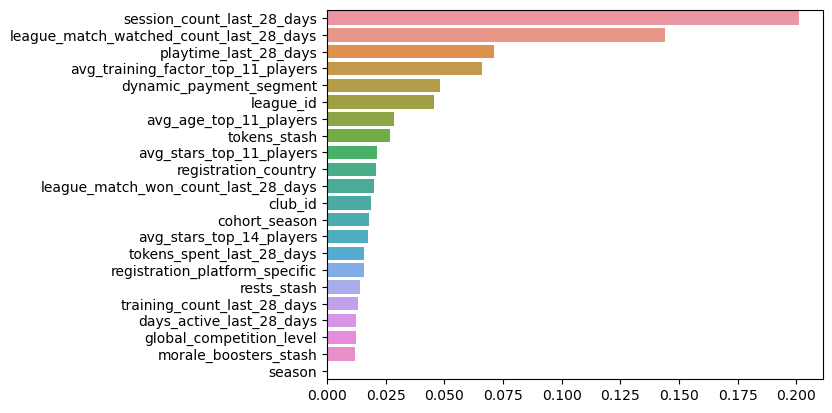

In [162]:
features_imp, features = list(zip(*reversed(sorted(list(zip(model.feature_importances_, X.columns))))))
sns.barplot(x=list(features_imp), y=list(features))

# Predicting and Saving test set